# Polish Lotto Extraction Analysis
This notebook contains code to fetch lotto extraction data, perform frequency analysis, and visualize the results with a color gradient.

NOTE: Please download [here](http://www.mbnet.com.pl/wyniki.htm) the txt file for the game you want, save it in the repository main directory with the name lotto.txt, miniLotto.txt, lottoPlus.txt  

## Importing Required Libraries

In [68]:
!pip install matplotlib numpy requests
import matplotlib.pyplot as plt
import numpy as np
from itertools import combinations
from collections import Counter
import requests
from datetime import datetime

## Download latest txt files

In [69]:
# Define names
LOTTO = "lotto.txt"
LOTTOPLUS = "lottoPlus.txt"
MINILOTTO = "miniLotto.txt"

# Define the URLs and corresponding file names
files = {
    "http://www.mbnet.com.pl/dl.txt": LOTTO,
    "http://www.mbnet.com.pl/dl_plus.txt": LOTTOPLUS,
    "http://www.mbnet.com.pl/el.txt": MINILOTTO
}

# Iterate over the dictionary and download each file
for url, filename in files.items():
    # Send a GET request to download the file
    response = requests.get(url)

    # Check if the request was successful
    if response.status_code == 200:
        # Write the content to the respective file
        with open(filename, "wb") as file:
            file.write(response.content)
        print(f"File downloaded and renamed to '{filename}'.")
    else:
        print(f"Failed to download the file from {url}. Status code:", response.status_code)

File downloaded and renamed to 'lotto.txt'.
File downloaded and renamed to 'lottoPlus.txt'.
File downloaded and renamed to 'miniLotto.txt'.


## Choose the file with the lotto number list

In [70]:
# Path to the txt file
file_path = LOTTO


## Function to Fetch Lotto Data

In [71]:
def read_lotto_data_from_txt(file_path):
    try:
        with open(file_path, 'r') as file:
            lines = file.readlines()

        lotto_data = {}
        for line in lines:
            # Splitting by space after the period to separate the draw number, date, and numbers
            parts = line.split('. ', 1)
            play_number = int(parts[0])

            # Splitting by space to separate the date and numbers
            date_and_numbers = parts[1].split(' ', 1)
            formatted_date = date_and_numbers[0]
            numbers = [int(num) for num in date_and_numbers[1].strip().split(',')]

            lotto_data[play_number] = {
                'date': formatted_date,
                'numbers': numbers  # Now numbers are stored as integers
            }

        return lotto_data

    except Exception as e:
        print(f'Error reading data: {e}')

# Fetching lotto results from the txt file
lotto_results = read_lotto_data_from_txt(LOTTO)
lotto_plus_results = read_lotto_data_from_txt(LOTTOPLUS)
mini_lotto_results = read_lotto_data_from_txt(MINILOTTO)

## Function to filter by data range

In [72]:
def filter_lotto_results_by_date(lotto_results, start_date, end_date):
    """
    Filters the lotto results to include only those within the specified date range.

    :param lotto_results: Dictionary of lotto results.
    :param start_date: String of start date in 'dd.mm.yyyy' format.
    :param end_date: String of end date in 'dd.mm.yyyy' format.
    :return: Filtered dictionary of lotto results.
    """
    # Convert start_date and end_date to datetime objects
    start_date = datetime.strptime(start_date, "%d.%m.%Y")
    end_date = datetime.strptime(end_date, "%d.%m.%Y")

    # Filter the results
    filtered_results = {}
    for play_number, play_data in lotto_results.items():
        play_date = datetime.strptime(play_data['date'], "%d.%m.%Y")
        if start_date <= play_date <= end_date:
            filtered_results[play_number] = play_data

    return filtered_results


## Select data range

In [73]:
# Example usage
start_date = "01.01.2024"
end_date = "30.12.2024"

lotto_results = filter_lotto_results_by_date(lotto_results, start_date, end_date)
lotto_plus_results = filter_lotto_results_by_date(lotto_plus_results, start_date, end_date)
mini_lotto_results = filter_lotto_results_by_date(mini_lotto_results, start_date, end_date)

# Now, filtered_lotto_results contains only the plays between the start_date and end_date

## Total draws in the selected period

In [74]:
total_draws_lotto = len(lotto_results)
print(f" LOTTO: {total_draws_lotto} draws from {start_date} to {end_date}")

total_draws_lotto_plus = len(lotto_plus_results)
print(f" LOTTO PLUS: {total_draws_lotto_plus} draws from {start_date} to {end_date}")

total_draws_mini_lotto = len(mini_lotto_results)
print(f" MINI LOTTO: {total_draws_mini_lotto} draws from {start_date} to {end_date}")

 LOTTO: 106 draws from 01.01.2024 to 30.12.2024
 LOTTO PLUS: 106 draws from 01.01.2024 to 30.12.2024
 MINI LOTTO: 247 draws from 01.01.2024 to 30.12.2024


## Last 10 draws

In [75]:
def display_last_10_results(lotto_type_name, lotto_results):
    """
    Displays the last 10 (newest) results from the provided lotto results dictionary.
    
    Parameters:
    - lotto_type_name (str): The name of the lotto type (e.g., 'LOTTO', 'LOTTO PLUS', 'MINI LOTTO').
    - lotto_results (dict): The dictionary containing the lotto results, where keys are play numbers and values are result data.
    """
    # Sorting and getting the last 10 plays
    last_10_plays = sorted(lotto_results.keys())[-10:]

    # Display results for the last 10 plays
    print(f"\n{lotto_type_name} - Last 10 Plays:")
    for play_number in last_10_plays:
        result = lotto_results[play_number]
        print(f"Play Number: {play_number}, Date: {result['date']}, Numbers: {result['numbers']}")

# Assuming you have the following dictionaries: lotto_results, lotto_plus_results, mini_lotto_results

# Displaying the last 10 results for LOTTO
display_last_10_results('LOTTO', lotto_results)

# Displaying the last 10 results for LOTTO PLUS
display_last_10_results('LOTTO PLUS', lotto_plus_results)

# Displaying the last 10 results for MINI LOTTO
display_last_10_results('MINI LOTTO', mini_lotto_results)




LOTTO - Last 10 Plays:
Play Number: 7078, Date: 13.08.2024, Numbers: [1, 13, 35, 36, 41, 47]
Play Number: 7079, Date: 15.08.2024, Numbers: [9, 17, 21, 33, 35, 37]
Play Number: 7080, Date: 17.08.2024, Numbers: [13, 16, 22, 30, 38, 44]
Play Number: 7081, Date: 20.08.2024, Numbers: [2, 17, 26, 27, 32, 40]
Play Number: 7082, Date: 22.08.2024, Numbers: [2, 3, 8, 12, 17, 21]
Play Number: 7083, Date: 24.08.2024, Numbers: [1, 6, 12, 36, 37, 49]
Play Number: 7084, Date: 27.08.2024, Numbers: [3, 15, 27, 34, 45, 46]
Play Number: 7085, Date: 29.08.2024, Numbers: [2, 13, 17, 23, 32, 41]
Play Number: 7086, Date: 31.08.2024, Numbers: [12, 14, 18, 30, 34, 38]
Play Number: 7087, Date: 03.09.2024, Numbers: [3, 11, 19, 21, 27, 44]

LOTTO PLUS - Last 10 Plays:
Play Number: 1865, Date: 13.08.2024, Numbers: [3, 5, 23, 26, 38, 47]
Play Number: 1866, Date: 15.08.2024, Numbers: [12, 14, 22, 25, 38, 40]
Play Number: 1867, Date: 17.08.2024, Numbers: [15, 16, 23, 34, 35, 43]
Play Number: 1868, Date: 20.08.2024, 

## Frequency Analysis

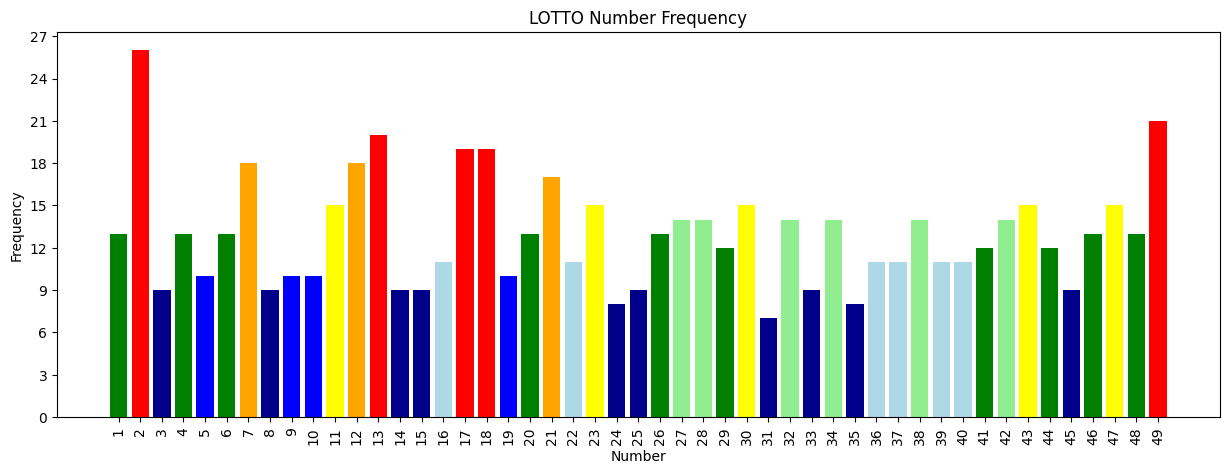

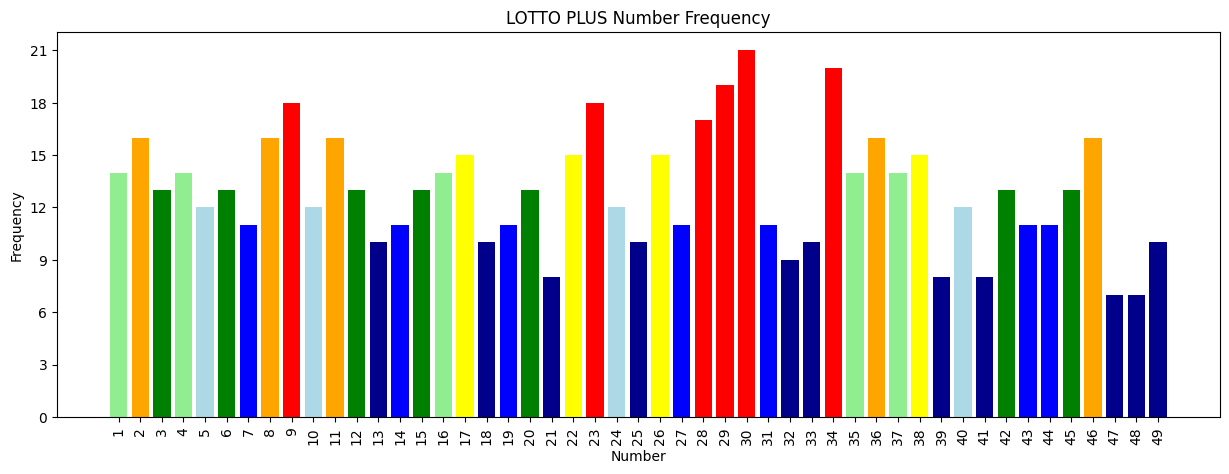

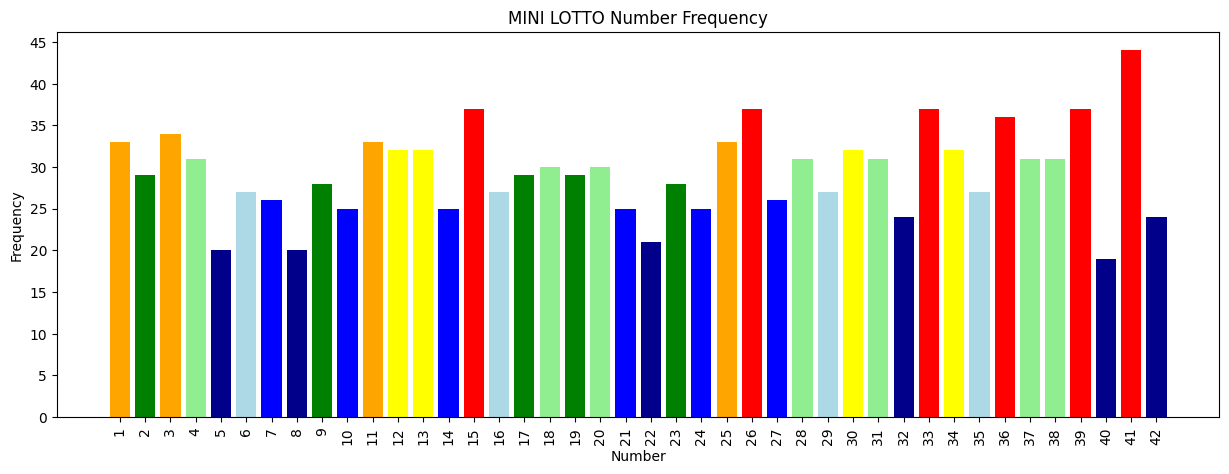

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import Counter

# Generalized frequency analysis and plotting function
def frequency_analysis_and_plot(lotto_type_name, lotto_data):
    """
    Performs frequency analysis on the provided lotto data and plots the frequency distribution with decile-based coloring.
    
    Parameters:
    - lotto_type_name (str): The name of the lotto type (e.g., 'LOTTO', 'LOTTO PLUS', 'MINI LOTTO').
    - lotto_data (dict): The dictionary containing the lotto results, where keys are play numbers and values are result data.
    
    Returns:
    - Counter: The frequency of each number drawn in the lotto data.
    """
    # Frequency analysis
    numbers = []
    for play in lotto_data.values():
        numbers.extend(play['numbers'])  # Collect all numbers from the draws

    number_frequency = Counter(numbers)  # Calculate the frequency of each number
    sorted_numbers = sorted(number_frequency.items(), key=lambda x: x[1])
    numbers, frequencies = zip(*sorted_numbers)

    # Define thresholds for the deciles
    thresholds = np.quantile(frequencies, np.linspace(1/8, 7/8, 7))

    # Define 10 colors for each decile
    octile_colors = [
        'darkblue',    # Least frequent - coldest
        'blue',
        'lightblue',
        'green',
        'lightgreen',
        'yellow',
        'orange',
        'red'        # Most frequent - hottest
    ]

    # Assign a color based on which decile each frequency falls into
    colors = []
    for freq in frequencies:
        for i, threshold in enumerate(thresholds):
            if freq <= threshold:
                colors.append(octile_colors[i])
                break
        else:
            colors.append(octile_colors[-1])  # Assign the last color to the top decile

    # Plotting the results with the assigned colors
    plt.figure(figsize=(15, 5))
    plt.bar(numbers, frequencies, color=colors)
    plt.xlabel('Number')
    plt.ylabel('Frequency')
    plt.title(f'{lotto_type_name} Number Frequency')
    plt.xticks(numbers, rotation=90)

    # Force the y-axis to have integer values
    plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

    plt.show()

    return number_frequency  # Return the frequency data for further use

# Frequency analysis and plotting for LOTTO
lotto_frequency = frequency_analysis_and_plot('LOTTO', lotto_results)

# Frequency analysis and plotting for LOTTO PLUS
lotto_plus_frequency = frequency_analysis_and_plot('LOTTO PLUS', lotto_plus_results)

# Frequency analysis and plotting for MINI LOTTO
mini_lotto_frequency = frequency_analysis_and_plot('MINI LOTTO', mini_lotto_results)



## Trend Analysis
This analysis examines how the frequency of specific numbers or combinations changes over time.

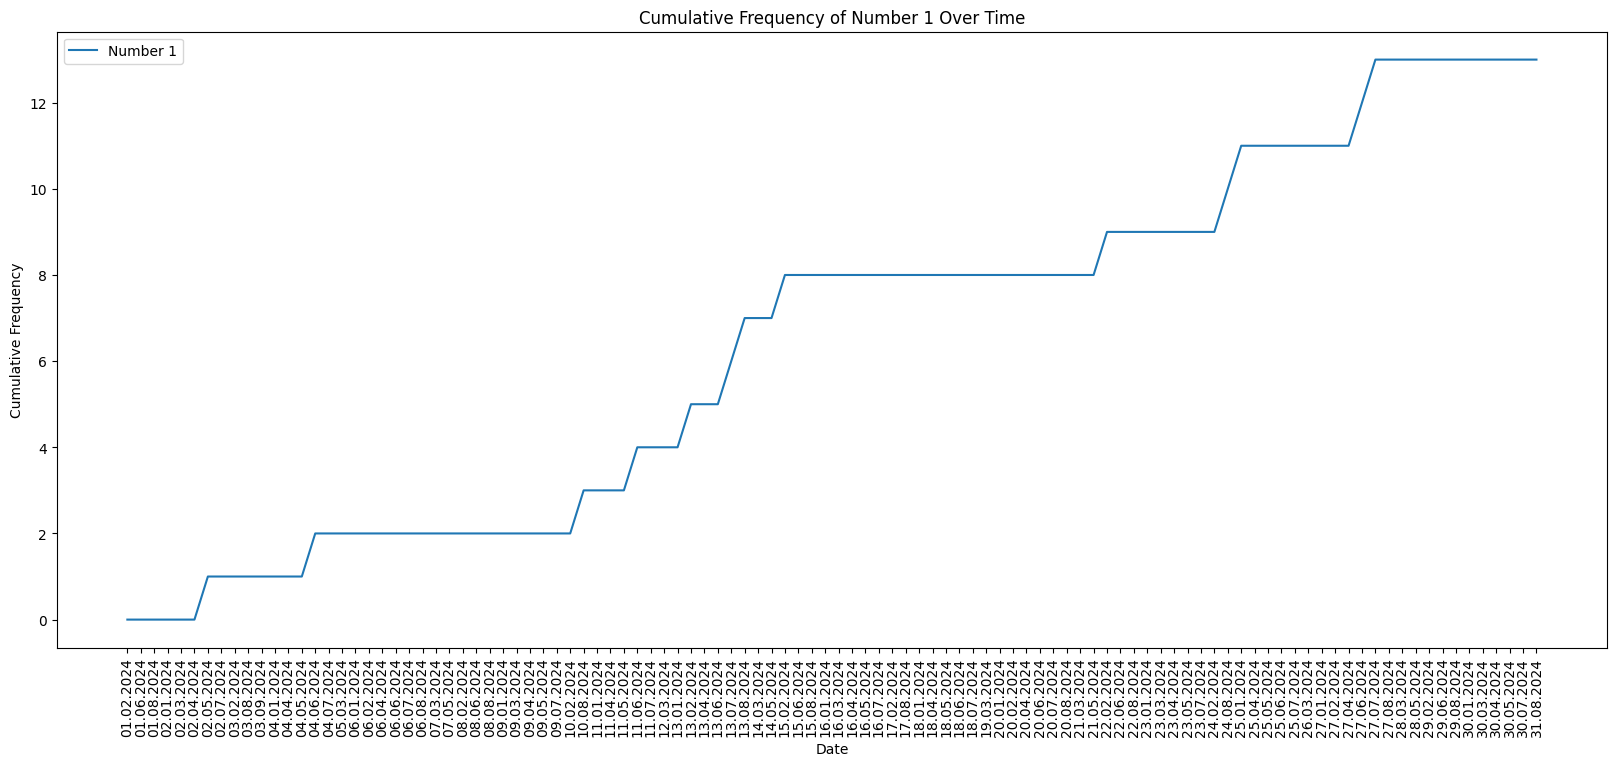

In [77]:
import matplotlib.pyplot as plt

def trend_analysis(lotto_data, target_number):
    dates = []
    occurrences = []
    count = 0
    for play in sorted(lotto_data.values(), key=lambda x: x['date']):
        dates.append(play['date'])
        if target_number in play['numbers']:
            count += 1
        occurrences.append(count)

    plt.figure(figsize=(20, 8))  # Increase figure size for better readability
    plt.plot(dates, occurrences, label=f'Number {target_number}')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Frequency')
    plt.title(f'Cumulative Frequency of Number {target_number} Over Time')
    plt.xticks(rotation=90)
    plt.legend()
    plt.show()

trend_analysis(lotto_results, target_number=1)



## Print the five more and less probable numbers

In [78]:
from collections import Counter

def display_most_and_least_frequent_numbers(lotto_type_name, lotto_data):
    """
    Displays the 5 most frequent and 5 least frequent numbers for a given lotto game.
    
    Parameters:
    - lotto_type_name (str): The name of the lotto game (e.g., 'LOTTO', 'LOTTO PLUS', 'MINI LOTTO').
    - lotto_data (dict): The dictionary containing the lotto results, where keys are play numbers and values are result data.
    """
    # Frequency analysis
    numbers = []
    for play in lotto_data.values():
        numbers.extend(play['numbers'])

    # Counting the frequency of each number
    number_frequency = Counter(numbers)

    # Sorting the numbers by frequency in descending order (most frequent)
    most_frequent_numbers = sorted(number_frequency, key=number_frequency.get, reverse=True)[:5]

    # Sorting the numbers by frequency in ascending order (least frequent)
    least_frequent_numbers = sorted(number_frequency, key=number_frequency.get)[:5]

    # Displaying the results
    print(f"\n{lotto_type_name} - Frequency Analysis:")
    print("5 Most Probable Numbers:", most_frequent_numbers)
    print("5 Least Probable Numbers:", least_frequent_numbers)
    
    return [most_frequent_numbers, least_frequent_numbers]

# Frequency analysis for each game
most_least_frequent_lotto = display_most_and_least_frequent_numbers('LOTTO', lotto_results)
most_least_frequent_lotto_plus = display_most_and_least_frequent_numbers('LOTTO PLUS', lotto_plus_results)
most_least_frequent_mini_lotto = display_most_and_least_frequent_numbers('MINI LOTTO', mini_lotto_results)



LOTTO - Frequency Analysis:
5 Most Probable Numbers: [2, 49, 13, 18, 17]
5 Least Probable Numbers: [31, 24, 35, 15, 25]

LOTTO PLUS - Frequency Analysis:
5 Most Probable Numbers: [30, 34, 29, 9, 23]
5 Least Probable Numbers: [48, 47, 21, 41, 39]

MINI LOTTO - Frequency Analysis:
5 Most Probable Numbers: [41, 39, 33, 26, 15]
5 Least Probable Numbers: [40, 8, 5, 22, 42]


## Verifying if the Most or Least Probable Sets of Five Numbers Have Been Previously Drawn

In [79]:
def check_occurrence(lotto_type_name, lotto_data, numbers_set):
    """
    Checks whether the provided set of numbers has occurred in the lotto results.
    
    Parameters:
    - lotto_type_name (str): The name of the lotto type (e.g., 'LOTTO', 'LOTTO PLUS', 'MINI LOTTO').
    - lotto_data (dict): The dictionary containing the lotto results, where keys are play numbers and values are result data.
    - numbers_set (set): The set of numbers to check for occurrence in the lotto data.
    
    Returns:
    - occurrences (list): A list of tuples (play_number, date) where the set of numbers occurred in the lotto results.
    """
    occurrences = []
    for play_number, play_data in lotto_data.items():
        if numbers_set.issubset(set(play_data['numbers'])):  # Check if numbers_set is a subset of the drawn numbers
            occurrences.append((play_number, play_data['date']))

    # Display results
    print(f"\nOccurrences of {lotto_type_name} with numbers {sorted(numbers_set)}:")
    if occurrences:
        for play_number, date in occurrences:
            print(f"Play Number: {play_number}, Date: {date}")
    else:
        print("None")


# Define your most and least frequent numbers sets for each game
most_probable_numbers_lotto = set(most_least_frequent_lotto[0])
least_probable_numbers_lotto = set(most_least_frequent_lotto[1])

most_probable_numbers_lotto_plus = set(most_least_frequent_lotto_plus[0])
least_probable_numbers_lotto_plus = set(most_least_frequent_lotto_plus[1])

most_probable_numbers_mini_lotto = set(most_least_frequent_mini_lotto[0])
least_probable_numbers_mini_lotto = set(most_least_frequent_mini_lotto[1])


# Check occurrences for LOTTO
check_occurrence('LOTTO', lotto_results, most_probable_numbers_lotto)
check_occurrence('LOTTO', lotto_results, least_probable_numbers_lotto)

# Check occurrences for LOTTO PLUS
check_occurrence('LOTTO PLUS', lotto_plus_results, most_probable_numbers_lotto_plus)
check_occurrence('LOTTO PLUS', lotto_plus_results, least_probable_numbers_lotto_plus)

# Check occurrences for MINI LOTTO
check_occurrence('MINI LOTTO', mini_lotto_results, most_probable_numbers_mini_lotto)
check_occurrence('MINI LOTTO', mini_lotto_results, least_probable_numbers_mini_lotto)




Occurrences of LOTTO with numbers [2, 13, 17, 18, 49]:
None

Occurrences of LOTTO with numbers [15, 24, 25, 31, 35]:
None

Occurrences of LOTTO PLUS with numbers [9, 23, 29, 30, 34]:
None

Occurrences of LOTTO PLUS with numbers [21, 39, 41, 47, 48]:
None

Occurrences of MINI LOTTO with numbers [15, 26, 33, 39, 41]:
None

Occurrences of MINI LOTTO with numbers [5, 8, 22, 40, 42]:
None


## Comprehensive Analysis of Lotto Number Combinations: Pairs, Triplets, and Quadruplets

In [80]:
from collections import Counter
from itertools import combinations

def analyze_combinations(lotto_type_name, lotto_data, combination_size=2):
    """
    Analyzes the frequency of combinations (like pairs, triplets, quadruplets) in the lotto data.

    :param lotto_type_name: Name of the lotto game (e.g., 'LOTTO', 'LOTTO PLUS', 'MINI LOTTO').
    :param lotto_data: Dictionary of lotto results.
    :param combination_size: Size of the combinations to analyze (2 for pairs, 3 for triplets, 4 for quadruplets).
    :return: Counter object with the frequency of each combination.
    """
    all_combinations = []

    # Iterate through each draw and find combinations
    for play_data in lotto_data.values():
        numbers = play_data['numbers']
        for combo in combinations(numbers, combination_size):
            all_combinations.append(tuple(sorted(combo)))

    # Create a Counter object to count the frequency of each combination
    combination_frequency = Counter(all_combinations)

    # Display the results
    print(f"\n{lotto_type_name} - {combination_size}-number combinations (Top 10 most frequent):")
    for combo, frequency in combination_frequency.most_common(10):
        print(f"Combination: {combo}, Frequency: {frequency}")

    return combination_frequency

# Analyze combinations for each game and combination size
for combination_size in [2, 3, 4]:  # For pairs, triplets, and quadruplets

    # Analyze combinations for LOTTO
    analyze_combinations('LOTTO', lotto_results, combination_size)

    # Analyze combinations for LOTTO PLUS
    analyze_combinations('LOTTO PLUS', lotto_plus_results, combination_size)

    # Analyze combinations for MINI LOTTO
    analyze_combinations('MINI LOTTO', mini_lotto_results, combination_size)



LOTTO - 2-number combinations (Top 10 most frequent):
Combination: (2, 13), Frequency: 7
Combination: (2, 6), Frequency: 7
Combination: (2, 18), Frequency: 7
Combination: (2, 38), Frequency: 6
Combination: (17, 32), Frequency: 6
Combination: (2, 42), Frequency: 5
Combination: (30, 42), Frequency: 5
Combination: (23, 28), Frequency: 5
Combination: (2, 17), Frequency: 5
Combination: (3, 27), Frequency: 5

LOTTO PLUS - 2-number combinations (Top 10 most frequent):
Combination: (29, 34), Frequency: 6
Combination: (28, 30), Frequency: 6
Combination: (7, 30), Frequency: 6
Combination: (15, 42), Frequency: 5
Combination: (8, 9), Frequency: 5
Combination: (11, 31), Frequency: 5
Combination: (9, 12), Frequency: 5
Combination: (22, 44), Frequency: 5
Combination: (15, 17), Frequency: 4
Combination: (8, 11), Frequency: 4

MINI LOTTO - 2-number combinations (Top 10 most frequent):
Combination: (25, 41), Frequency: 8
Combination: (33, 37), Frequency: 8
Combination: (1, 41), Frequency: 8
Combination

## Detailed Analysis of Lotto Number Distributions and Trends

Change bin size for broader view or more granularity

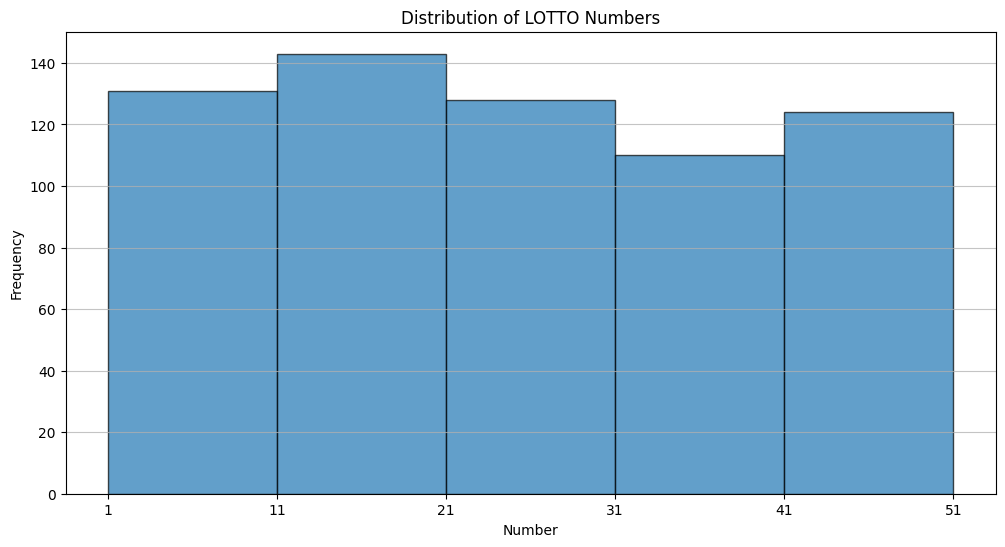


LOTTO - Bin Frequencies (Highest to Lowest):
Range: 11-20, Frequency: 143
Range: 1-10, Frequency: 131
Range: 21-30, Frequency: 128
Range: 41-50, Frequency: 124
Range: 31-40, Frequency: 110


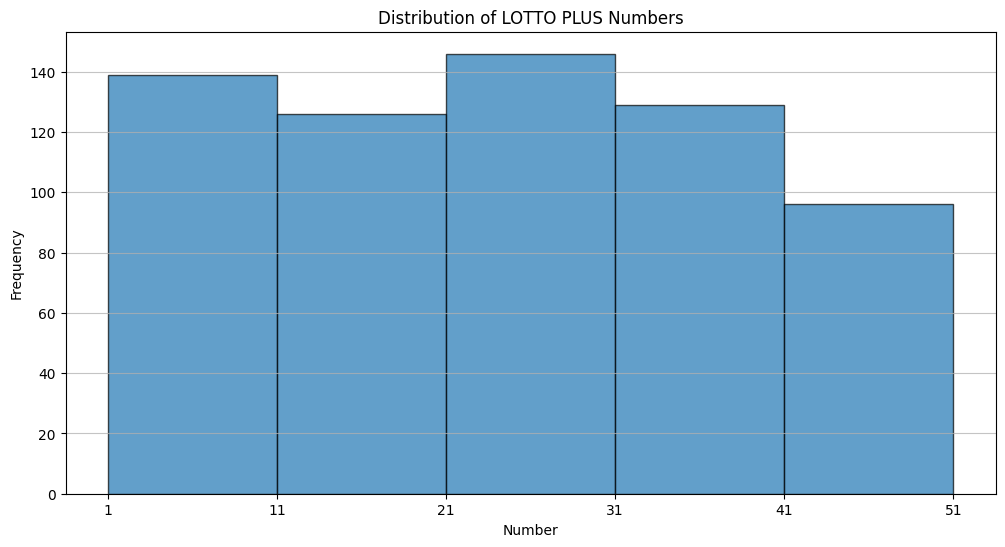


LOTTO PLUS - Bin Frequencies (Highest to Lowest):
Range: 21-30, Frequency: 146
Range: 1-10, Frequency: 139
Range: 31-40, Frequency: 129
Range: 11-20, Frequency: 126
Range: 41-50, Frequency: 96


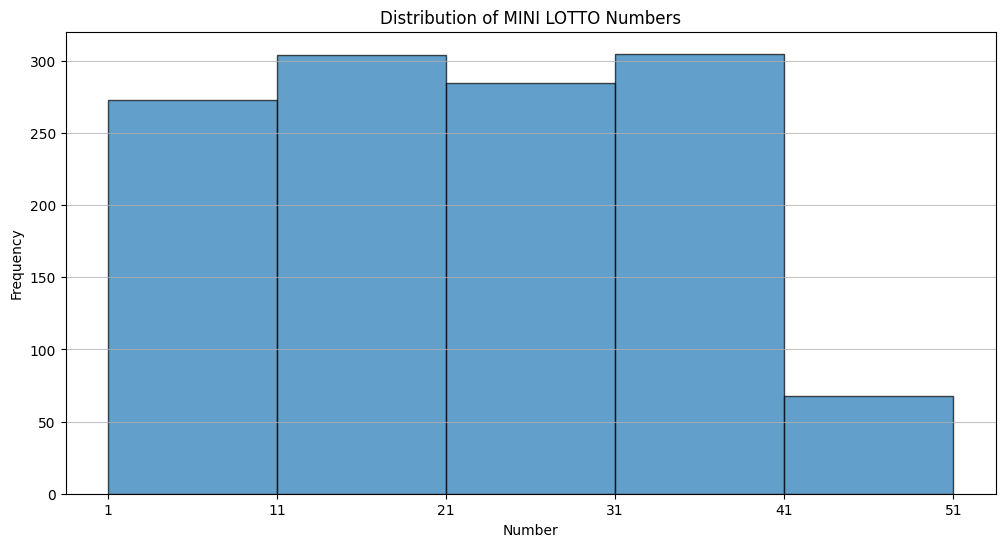


MINI LOTTO - Bin Frequencies (Highest to Lowest):
Range: 31-40, Frequency: 305
Range: 11-20, Frequency: 304
Range: 21-30, Frequency: 285
Range: 1-10, Frequency: 273
Range: 41-50, Frequency: 68


In [81]:
import matplotlib.pyplot as plt
from collections import Counter

def plot_number_distribution(lotto_type_name, lotto_data, bin_size=10):
    """
    Plots the distribution of lotto numbers with more detailed x-axis, adapted for different lotto types.

    :param lotto_type_name: Name of the lotto game (e.g., 'LOTTO', 'LOTTO PLUS', 'MINI LOTTO').
    :param lotto_data: Dictionary of lotto results.
    :param bin_size: Size of each bin in the histogram, default is 10 for coarser detail.
    """
    all_numbers = []
    for play_data in lotto_data.values():
        all_numbers.extend(play_data['numbers'])

    # Determine the range of numbers
    min_number = min(all_numbers)
    max_number = max(all_numbers)

    # Create a histogram to visualize the distribution
    plt.figure(figsize=(12, 6))
    counts, bins, patches = plt.hist(all_numbers, bins=range(min_number, max_number + bin_size, bin_size), edgecolor='black', alpha=0.7)

    # Adjust the x-axis to cover the entire range of bins
    plt.xticks(range(min_number, max_number + bin_size, bin_size))

    plt.xlabel('Number')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {lotto_type_name} Numbers')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

    # Sorting and printing bin frequencies from highest to lowest
    bin_frequencies = Counter({f'{int(bins[i])}-{int(bins[i+1])-1}': int(counts[i]) for i in range(len(counts))})
    print(f"\n{lotto_type_name} - Bin Frequencies (Highest to Lowest):")
    for bin_range, frequency in bin_frequencies.most_common():
        print(f"Range: {bin_range}, Frequency: {frequency}")

# Example usage
plot_number_distribution('LOTTO', lotto_results)
plot_number_distribution('LOTTO PLUS', lotto_plus_results)
plot_number_distribution('MINI LOTTO', mini_lotto_results)


## Dynamic Number Suggestion Based on Game Type

In [112]:
import random
from collections import Counter

def suggest_numbers(frequency_dict, game_type, high_freq_ratio=0.6, method='weighted', random_seed=None):
    """
    Suggests a set of numbers based on frequency analysis, adapting to the Lotto, Lotto Plus, or Mini Lotto game.
    
    Parameters:
    - frequency_dict (dict): A dictionary where keys are numbers and values are their frequencies.
    - game_type (str): The type of game ('LOTTO', 'MINILOTTO', 'LOTTOPLUS').
    - high_freq_ratio (float): Ratio of high-frequency numbers to include (between 0 and 1). Used only if method='mix'.
    - method (str): 'mix' to combine high and low frequencies, 'weighted' for weighted random selection.
    - random_seed (int, optional): Seed for reproducibility.
    
    Returns:
    - set: A set of suggested numbers.
    """
    # Set the game type and corresponding parameters
    if game_type == 'LOTTO':
        total_numbers = 6  # Lotto requires selecting 6 numbers
    elif game_type == 'MINILOTTO':
        total_numbers = 5  # Mini Lotto requires selecting 5 numbers
    elif game_type == 'LOTTOPLUS':
        total_numbers = 6  # Lotto Plus also uses 6 numbers
    else:
        raise ValueError(f"Invalid game type: {game_type}")

    if random_seed is not None:
        random.seed(random_seed)

    if method == 'mix':
        # Sort numbers by frequency
        sorted_numbers = sorted(frequency_dict.items(), key=lambda item: item[1], reverse=True)

        # Determine the number of high and low-frequency numbers
        num_high = int(total_numbers * high_freq_ratio)
        num_low = total_numbers - num_high

        # Select high-frequency numbers
        high_freq_numbers = [num for num, freq in sorted_numbers[:num_high]]

        # Select low-frequency numbers
        low_freq_numbers = [num for num, freq in sorted_numbers[-num_low:]]

        # Randomly select from high and low frequency pools
        selected_high = set(random.sample(high_freq_numbers, min(len(high_freq_numbers), num_high)))
        selected_low = set(random.sample(low_freq_numbers, min(len(low_freq_numbers), num_low)))

        # Combine the selections
        suggested_numbers = selected_high.union(selected_low)

        # If not enough numbers due to sampling limits, fill the rest randomly
        while len(suggested_numbers) < total_numbers:
            remaining = total_numbers - len(suggested_numbers)
            all_numbers = set(frequency_dict.keys())
            possible_numbers = all_numbers - suggested_numbers
            suggested_numbers.update(random.sample(possible_numbers, min(len(possible_numbers), remaining)))

    elif method == 'weighted':
        # Weighted random selection based on frequency
        numbers = list(frequency_dict.keys())
        frequencies = list(frequency_dict.values())
        total_freq = sum(frequencies)
        probabilities = [freq / total_freq for freq in frequencies]

        suggested_numbers = set()
        while len(suggested_numbers) < total_numbers:
            number = random.choices(numbers, weights=probabilities, k=1)[0]
            suggested_numbers.add(number)
    else:
        raise ValueError("Invalid method. Choose 'mix' or 'weighted'.")

    return suggested_numbers

# Suggest numbers for LOTTO
suggested_lotto_numbers = suggest_numbers(lotto_frequency, game_type='LOTTO')
print(f"Suggested numbers for LOTTO: {sorted(suggested_lotto_numbers)}")

# Suggest numbers for LOTTO PLUS
suggested_lotto_plus_numbers = suggest_numbers(lotto_plus_frequency, game_type='LOTTOPLUS')
print(f"Suggested numbers for LOTTO PLUS: {sorted(suggested_lotto_plus_numbers)}")

# Suggest numbers for MINI LOTTO
suggested_mini_lotto_numbers = suggest_numbers(mini_lotto_frequency, game_type='MINILOTTO')
print(f"Suggested numbers for MINI LOTTO: {sorted(suggested_mini_lotto_numbers)}")






Suggested numbers for LOTTO: [1, 2, 3, 8, 21, 27]
Suggested numbers for LOTTO PLUS: [26, 28, 36, 39, 40, 42]
Suggested numbers for MINI LOTTO: [15, 21, 30, 39, 40]
